#  Оглавление

1. [Введение](#part_0)
2. [Загрузка данных](#part_1)
3. [Исследовательский анализ данных (EDA)](#part_2)
4. [Модель прогнозирования оттока клиентов](#part_3)
5. [Кластеризация данных](#part_4)
6. [Выводы и рекомендации](#part_5)

# Введение <a id="part_0"></a>

Сеть фитнес-центров «Культурист-датасаентист» хочет спрогнозировать отток клиентов в следующем месяце на основании имеющихся данных. 

**Цель работы** - разработка стратегии удержания клиентов фитнес-центра на основе аналитических данных. 

Для достижения цели были решены следующие **задачи**:
- Исследовательский анализ данных - как признаков, так и целевой переменной.
- Составление портрета клиента и его подтверждение.
- Использование моделей бинарной классификации для прогнозирования оттока.
- Использование дендрограммы и метода `KMean` для кластеризации клиентов и подтверждения портрета. 
- Рекомендации на основании полученных выводов.

# Импорт библиотек и загрузка данных <a id="part_1"></a>

Для начала импортируем необходимые библиотеки и загрузим информационный датасет `data`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
data = pd.read_csv('/datasets/gym_churn.csv')

# Исследовательский анализ данных (EDA) <a id="part_2"></a>
Далее- время исследовательского анализа данных. При помощи функции `EDA_first_step` выведем основные характеристики датасета: размерность, информацию о столбцах, средние значения и стандартные отклонения, а также таблицу средних значений каждого признака при группировке по целевой переменной (`Churn`- отток)

In [4]:
def EDA_first_step(df):
    print('Размер датасета:{}'.format(data.shape))
    print()
    print(data.info(), end='\n')
    display(data.describe())
    display(data.groupby('Churn').mean())

Итак, в нашем датафрейме - 4000 строк, пропуски значений отсутствуют. Все столбцы - числовые (целочисленные `int64` или вещественные `float64`), соответственно, преобразовывать данные не нужно. 

In [5]:
EDA_first_step(data)

Размер датасета:(4000, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total   

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Рассмотрим внимательно таблицы с данными. Целевая переменная `Churn` принимает 2 значения: 0 (клиент остался) или 1 (клиент ушел). Если проанализировать данные в таблицах, что можно увидеть следующее: 
- `gender`. Соотношение мужчин и женщин что в общей выборке, что в разрезе `Churn` -  примерно одинаковое. (49/51%). Чуть больше посетителей с гендером 1 (это видно по медианному значению, равному 1). Т.к. расшифровки данных нет, будет считать, что это мужчины. 
- `Near_Location`. Большая часть клиентов зала проживает недалеко (опять же считаем, что 1- это близкое расположение) - среднее значение 0.84 и значение даже первого квартиля - уже 1. Однако по показателю `Churn` - близко к залу живет 87% постоянных клиентов, тогда как у потерянных клиентов этот показатель ниже и составляет 78%. 
- `Partner`. Среднее значение по данному показателю довольно высокое (0,48), однако количество пользователей данной программы находится между Q2 и Q3. Показатель партнерства выше у постоянных клиентов (0,53), нежели у тех, кто прекратил отношения с залом (0.35).
- `Promo_friends`. Похожая ситуация и с промо-акцией "Приведи друга". Среднее значение по общей выборке довльно небольшое (0.30), целевое значение (1) достигается только к третьему квартилю. Как и в прошлом показателе, количество участников промоакции выше среди постоянных пользователей (0.35), нежели у ушедших (0.18). Разница- практически в 2 раза. 
- `Phone`. Практически все клиенты спортзала оставляют свой телефон, этот показатель очень высок (среднее - 0.9 по всей выборке). 
- `Contract_period`. Клиенты зала могут оформить контракт на срок от 1 до 12 месяцев, в связи с этим среднии срок контракта довольно небольшой - 4.68. Значение Q2 - 1 месяц, Q3 - 6 месяцев. Это значит, что только 25% пользователей заключают контракт на 6 и более месяцев. Это находит подверждение по данным в разрезе `Churn` - средний период контракта у постояннх пользователей близок к полугоду (5.74), тогда как срок контракта ушедших клиентов очень мал и в среднем составляет 1.7 месяцев. 
- `Group_visits`. Большая часть клиентов не посещает групповые занятия и предпочитает тренироваться индивидуально (среднее - 0.41, Q3 - 1). Этот показатель опять же выше у постоянных клиентов (0.46 при `Churn`= 1, 0.26 при `Churn`= 0)
- `Age`. Зал посещают клиенты от 18 до 41 года, средний возраст совпадает с медианным и составляет 29 лет. Возраст постоянных клиентов схож со средним (29.97), возраст ушедших - на 3 года ниже (26.98)
- `Avg_additional_charges_total`. Суммарная выручка за дополнительные услуги колеблется от 0.14 до 552.59 со средним значением 146.94. Опять же, у постоянных пользователей этот показатель чуть выше (158.44), у ушедших - ниже примерно на четверть (115.08). 
- `Month_to_end_contract` - здесь показатели схожи с `Contract_period` и это неудивительно, ведь эти признаки взаимосвязаны. У постоянных клиентов данный показатель в 3 раза выше, чем у ушедших (5.28/1.66).
- `Lifetime`. Время, прошедшее с момента обращения клиента в первый раз невелико и составляет в среднем 3.72 мес., 75% клиентов занимаются в зале менее 5 месяцев. Данный показатель для постоянных клиентов почти в 5 раз выше, чем для ушедших (4.71/0.99)
- `Avg_class_frequency_total`. Средняя частота посещений -  1.76 раз в неделю, совпадает с медианной частотой. Опять же, для постоянных клиентов этот показатель выше, чем для ушедших (2.02/1.47).
- `Avg_class_frequency_current_month`. Показатель напрямую связан с предыдущим и, по сути, его дублирует. Именно поэтому значения данного параметра практически не отличаются от предыдущего. 

Построим графики распределения и посмотрим, как они соотносятся с наблюдениями. 

In [6]:
data_churn_yes = data.loc[data.loc[:, 'Churn'] == 1]
data_churn_no = data.loc[data.loc[:, 'Churn'] == 0]

In [7]:
def EDA_plot_new(df1, df2):
    for col in df1.drop('Churn', axis = 1):
        
        plt.figure(figsize=(15, 5))
        ax1 = plt.subplot(1, 2, 1)
        ax1 = sns.distplot(df1[col], color = 'green')
        
        ax2 = plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
        ax2 = sns.distplot(df2[col], color = 'blue')
        
        plt.show()

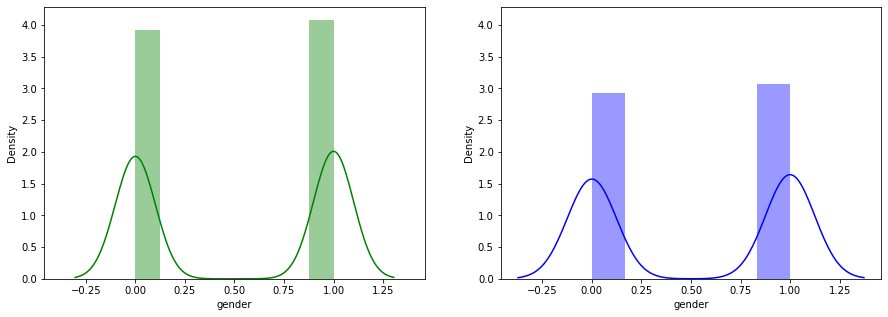

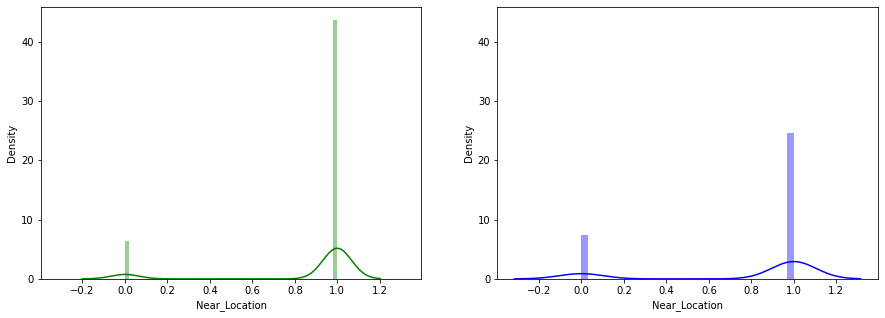

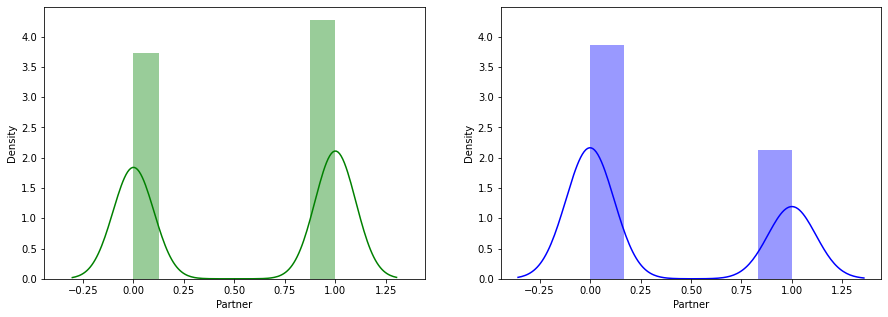

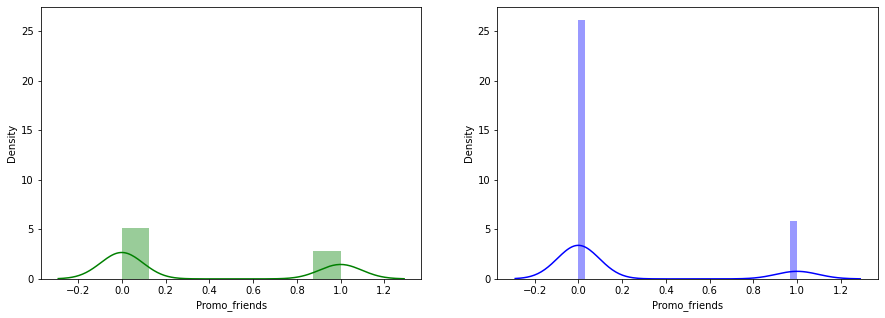

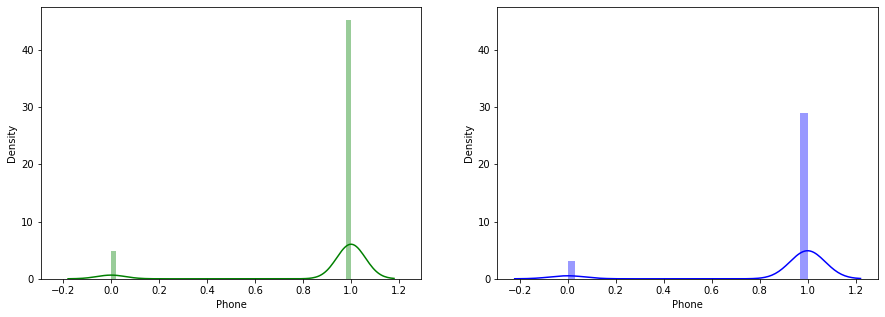

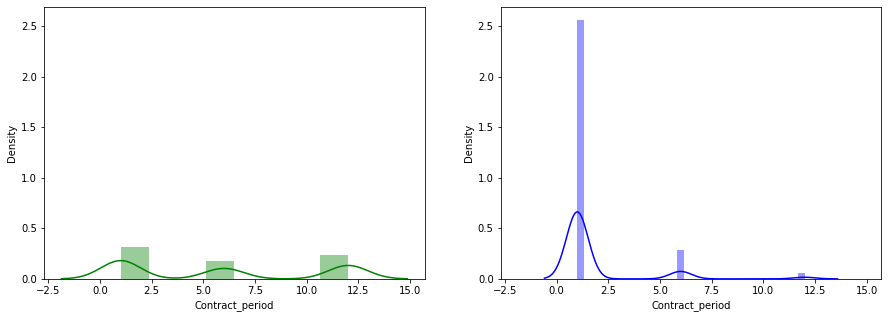

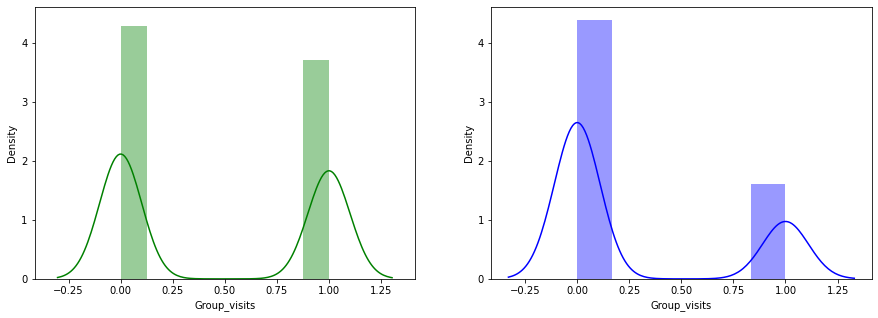

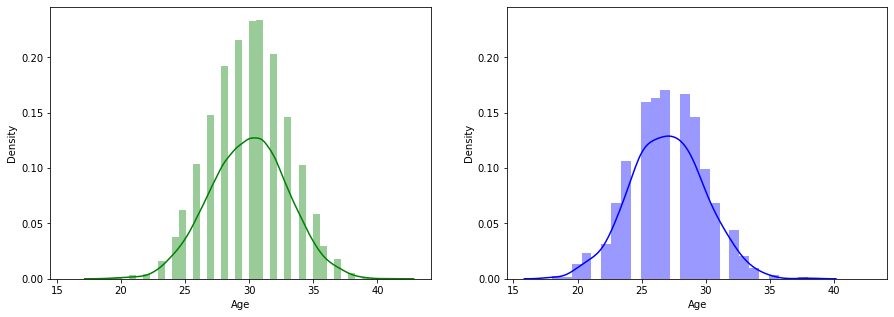

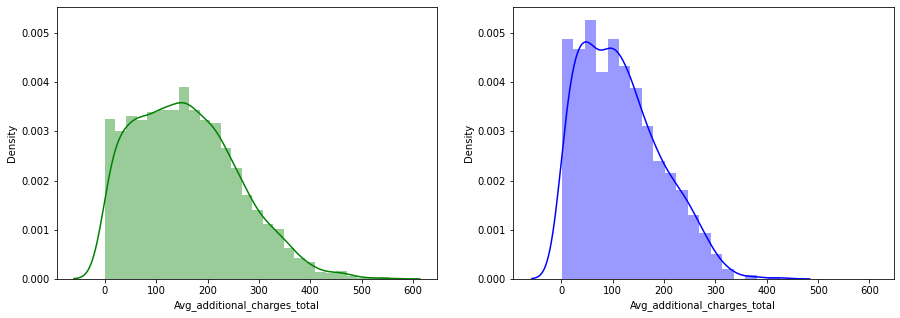

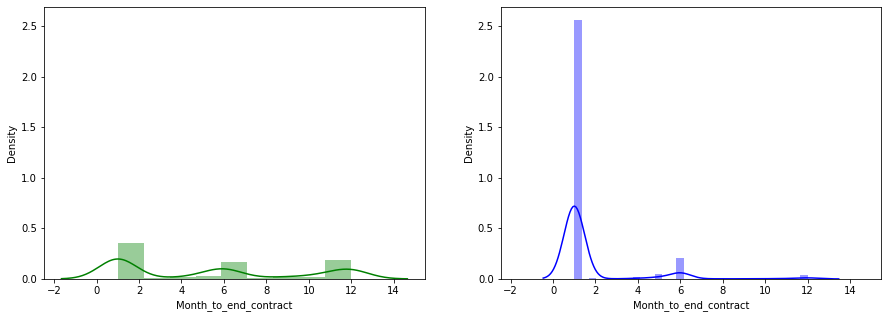

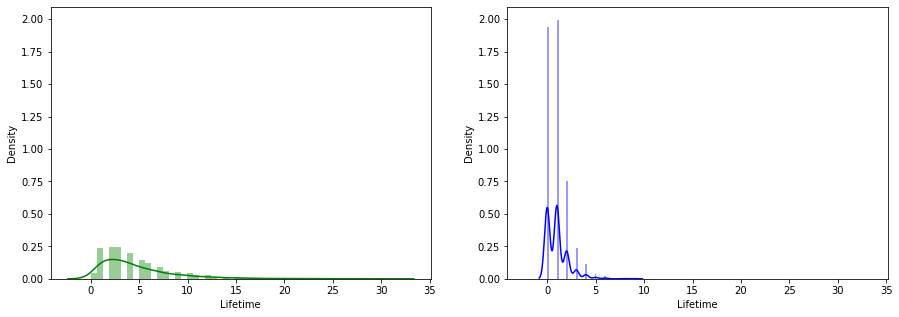

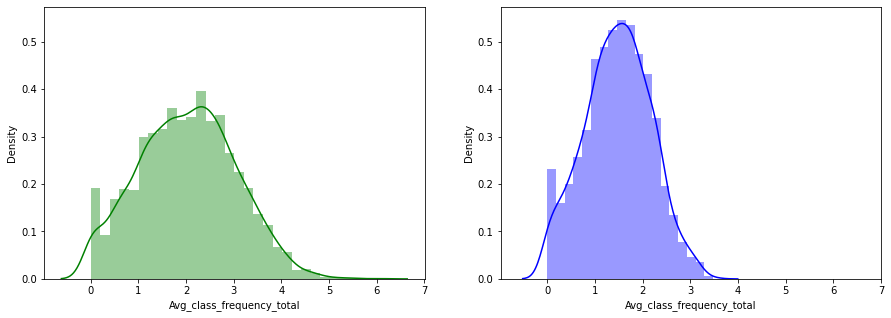

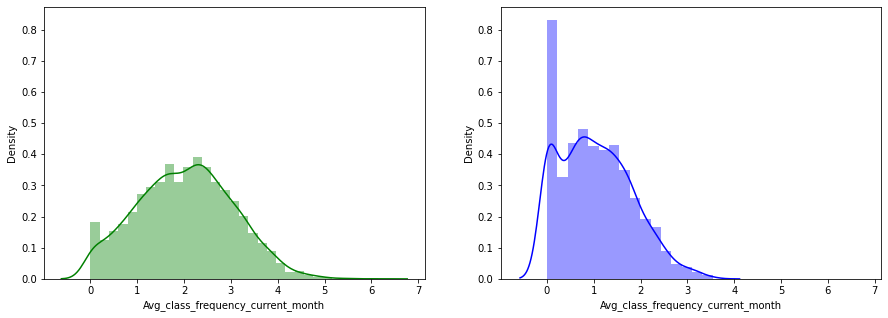

In [8]:
EDA_plot_new(data_churn_no, data_churn_yes)

Итак, при помощи функции `distplot` были построены гистограммы и распределния для тех клиентов, кто остался (зеленый график) и тех, кто ушел (синий график). 
Если рассмотреть графики, можно заметить следующее: 
- И среди посещающих зал, и среди ушедних - распределение гендеров одинаково.
- Подтверждается предположение о том, что среди ушедших клиентов доля проживающих недалеко от зала ниже, чем у тех, кто посещает.
- Подтверждается также и то, что ушедшие практически не пользовались программой "приведи друга". Партнерская программа также представлена меньше в этой группе, нежели у постоянных посетителей.
- Большая часть ушедших имеют очень короткие абонементы (до 2х месяцев) и не посещают групповые занятия, вследствие этого они имеют малое время жизни. 
- Ушедшие пользователи в среднем посещают зал в 2 раза реже, чем постоянные. 

Построим попарное распределение и изучим его для подтверждения предположений:

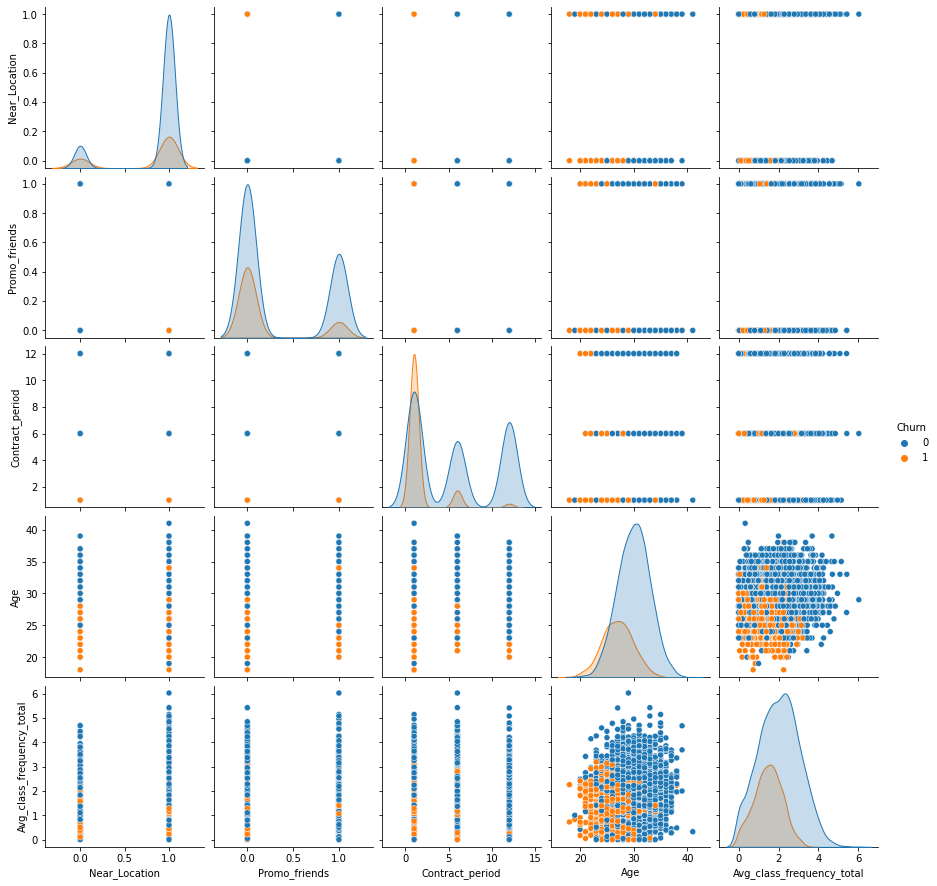

In [9]:
data_signs = data[['Near_Location', 'Promo_friends', 'Contract_period', 'Age', 'Avg_class_frequency_total', 'Churn']]
sns.pairplot(data = data_signs, hue = 'Churn')
plt.show()

Графики попарного распределения полностью подтверждают то, о чем было сказано ранее. Больше всего ушедших - в категории до 30 лет, с малым периодом контракта и пришедших не по промоакциям. 

Исходя из вышесказанного, можно предположить портрет клиентов: 
- **Постоянный клиент:** Возраст - 30 лет, живет или работает рядом с залом. Пришел в зал от компании-партнера или по промоакции "Приведи друга", средняя длительность абонемента - 6 мес.  В среднем приходит в зал 2 раза в неделю, тратит на допуслуги сумму 158.44, средний лайфтайм такого клиента- 4.7 мес. 
- **Ушедший клиент:** Возраст - 27 лет, чаще всего живет или работает рядом с залом. Маловероятно, что он пришел в зал от компании партнера или по промоакции, средняя длительность абонемента - чуть меньше 2 мес. Посещает зал в среднем 1.5 раза в неделю, тратит на допуслуги 115.08, средний лайфтайм - 1 месяц. 

Теперь перейдем к признакам. Построим тепловую карту по матрице корреляции признаков. Для этого напишем функцию `EDA_heatmap`, которая создаст матрицу корреляции и построит по ней тепловую карту

In [10]:
def EDA_heatmap(df):
    cm = round(df.corr(), 2)
    plt.figure(figsize=(12, 12))
    sns.heatmap(cm, annot=True, square=True)
    plt.show()

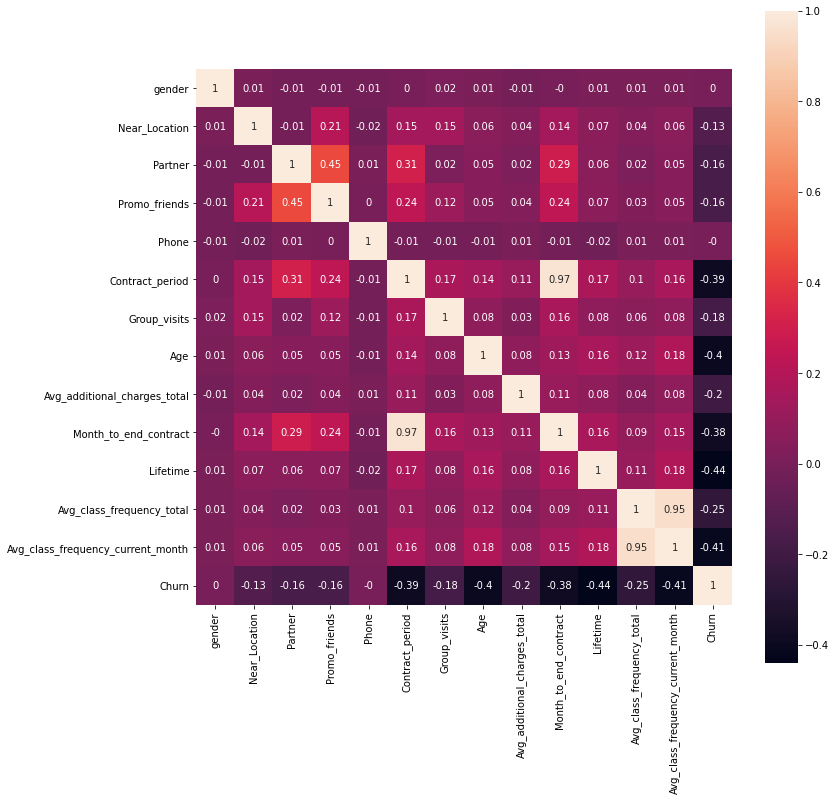

In [11]:
EDA_heatmap(data)

На тепловой карте видно, что есть 2 пары коррелирующих признаков: 
- Длительность контракта - месяцы до конца контракта (`Contract_period` - `Month_to_end_contract`).
- Среднее количество посещений зала - Среднее количество посещений зала за последний месяц (`Avg_class_frequency_total` - `Avg_class_frequency_current_month`).

Даже интуитивно было понятно, что эти признаки взаимозаменяемы и находятся в прямой зависимости. 
Учтем это при обучении нашей модели. 

# Модель прогнозирования оттока клиентов <a id="part_3"></a>

Создадим модель прогнозирования оттока клиентов. Отнесу данную задачу к бинарной классификации, т.к. конечный ответ нашего прогноза- 0 (нет) или 1 (да). Используем для прогнозирования модели логистической регрессии (`LogisticRegression`) и случайного леса (`RandomForestClassifier`), а затем выберем лучшую. 

Для данных моделей не обязательна нормализация признаков, однако важна регуляризация - т.к. у нас присуствуют коррелирующие признаки (2 пары), при создании матрицы признаков удалим один признак из пары. 
Использую функцию `predict_metrics`, которая проработает выбранные алгоритмы и выдаст просчитает метрики классификации: `Accuracy`, `Precision` и `Recall`. 
Для модели `RandomForestClassifier` примем количество деревьев - 100. 

In [12]:
model = [LogisticRegression(solver='liblinear', random_state = 0), RandomForestClassifier(n_estimators = 100, random_state = 0)]

In [13]:
def predict_metrics(data, models):
    
    X = data.drop(['Churn', 'Month_to_end_contract', 'Avg_class_frequency_current_month'], 
                  axis = 1) #создаем матрицу признаков без коррелирующих признаков
    y = data['Churn']  #создаем вектор целевой переменной
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                            random_state = 0) #делим выборку на обучающую и валидационную (80-20)
   
    accuracy = []
    precision = []
    recall = []
    
    for i in models:
        mod = i
        mod.fit(X_train, y_train)
        predictions = mod.predict(X_test)
        
        accuracy.append(round(accuracy_score(y_test, predictions), 3))
        precision.append(round(precision_score(y_test, predictions),3))
        recall.append(round(recall_score(y_test, predictions), 3))
        
    metrics = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})
    
    display(metrics)

In [14]:
predict_metrics(data, model)

,Model,Accuracy,Precision,Recall
0,"LogisticRegression(random_state=0, solver='lib...",0.884,0.761,0.773
1,"(DecisionTreeClassifier(max_features='auto', r...",0.890,0.784,0.768


Функция `predict_metrics` отработала свое и посчитала необходимые метрики для каждой из выбранных моделей. Показатели очень близки, однако я предположу, что  `RandomForestClassifier` отрабатывает в данном случае лучше, т.к. ее метрики чуть выше, чем у `LogisticRegression`:
- `Accuracy` (точность предсказания) - 0.890/0.884. Здесь метрики практически равны. 
- `Precision` (точность предсказания среди целевого класса) - 0.784/0.761. Т.е. данная модель предсказывает верные ответы в целевом стеке с точностью 78%, тогда как линейная регрессия остает по данному показателю (76%)
- `Recall` (полнота предсказания) - 0.768/0.773. Этот показатель указывает, сколько реальных объектов нужного класса было обнаружено, здесь метрики также практически равны. 

Таким образом, среди двух моделей я считаю, что `RandomForestClassifier` подходит для прогнозирования текущей задачи удачнее, нежели `LogisticRegression`. Однако логистическая регрессия также показала себя с хорошей стороны и ее также можно успешно использовать для решения задачи.

# Кластеризация клиентов <a id="part_4"></a>

Приступим к кластеризации клиентов. Перед тем, как начать кластеризацию, стандартизируем данные и проведем регуляризацию, как делали выше - это важно для последующего обучения модели. 

Затем используем две модели кластеризации:
- Дендрограмму - это медленный способ, который создаст иерархию признаков и, исходя из нее, можно будет предположить оптимальное количество кластеров. 
- KMeans - способ быстрой кластеризации. По умолчанию, примем число кластеров n = 5. 

In [15]:
X = data.drop(['Churn', 'Month_to_end_contract', 'Avg_class_frequency_current_month'], axis = 1)
y = data['Churn']

scaler = StandardScaler() # создадим объект класса StandardScaler
X_sc = scaler.fit_transform(X)    #обучаем стандартизатор и трансформируем выборку

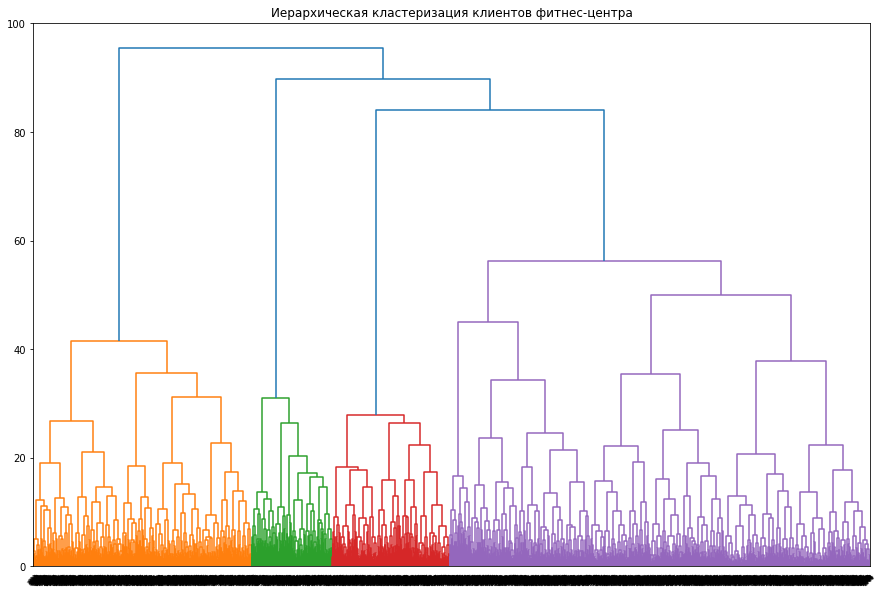

In [16]:
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация клиентов фитнес-центра')
plt.xticks(rotation=45)
plt.show() 

Как видно по дендрограмме, минимальное количество кластеров - 4. Однако можно разбить группы и на 5 кластеров, это не будет ошибочным. 
Перейдем к модели `KMeans` и напишем функцию `k_means_function`, которая расчитает необходимые кластеры и вернет таблицу с клиентами, разделенными по категориям. 

In [17]:
def k_means_function(df, X_sc):
    
    km = KMeans(n_clusters = 5, random_state=0) 
    labels = km.fit_predict(X_sc)
        
    data_k_means = df.drop(['Month_to_end_contract', 'Avg_class_frequency_current_month'], axis = 1)
    data_k_means['labels'] = labels
        
    display(data_k_means.groupby(['labels']).mean())
    display(data_k_means.groupby(['labels', 'Churn']).mean())
    
    return(data_k_means)

In [18]:
data_k_means = k_means_function(data, X_sc = X_sc)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total,Churn
labels,,,,,,,,,,,,
0,0.499109,0.000000,0.488414,0.076649,1.0,3.032086,0.235294,28.721925,137.540009,3.060606,1.770413,0.399287
1,0.488571,0.995238,0.955238,0.892381,1.0,7.660952,0.458095,29.543810,155.861428,4.380952,1.978963,0.120952
2,0.505300,1.000000,0.238516,0.059187,1.0,2.819788,0.000000,28.770318,143.383993,3.343640,1.800647,0.381625
3,0.544202,1.000000,0.250287,0.079219,1.0,4.528129,1.000000,29.536165,148.088897,3.761194,1.941342,0.200918
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.854211,0.266839


gender  Near_Location   Partner  Promo_friends  Phone  \
labels Churn                                                            
0      0      0.498516       0.000000  0.554896       0.100890    1.0   
       1      0.500000       0.000000  0.388393       0.040179    1.0   
1      0      0.491874       0.995666  0.949079       0.879740    1.0   
       1      0.464567       0.992126  1.000000       0.984252    1.0   
2      0      0.500000       1.000000  0.254286       0.054286    1.0   
       1      0.513889       1.000000  0.212963       0.067130    1.0   
3      0      0.544540       1.000000  0.268678       0.076149    1.0   
       1      0.542857       1.000000  0.177143       0.091429    1.0   
4      0      0.522968       0.886926  0.501767       0.360424    0.0   
       1      0.524272       0.796117  0.388350       0.155340    0.0   

              Contract_period  Group_visits        Age  \
labels Churn                                             
0      0             4.080119      0.284866  29.878338   
       1             1.455357      0.160714  26.982143   
1      0             8.345612      0.477790  29.927411   
       1             2.685039      0.314961  26.755906   
2      0             3.568571      0.000000  29.875714   
       1             1.606481      0.000000  26.979167   
3      0             5.252874      1.000000  30.147989   
       1             1.645714      1.000000  27.102857   
4      0             5.862191      0.462898  30.081272   
       1             1.796117      0.330097  27.145631   

              Avg_additional_charges_total  Lifetime  \
labels Churn                                           
0      0                        150.340864  4.433234   
       1                        118.281581  0.995536   
1      0                        161.511021  4.856988   
       1                        114.801787  0.921260   
2      0                        160.159968  4.757143   
       1                        116.200701  1.053241   
3      0                        157.147560  4.479885   
       1                        112.061303  0.902857   
4      0                        157.052061  5.028269   
       1                        108.918677  0.951456   

              Avg_class_frequency_total  
labels Churn                             
0      0                       2.008369  
       1                       1.412416  
1      0                       2.055298  
       1                       1.424180  
2      0                       2.002984  
       1                       1.472786  
3      0                       2.037729  
       1                       1.557995  
4      0                       1.967847  
       1                       1.541987

Функция `k_means_function` успешно отработала и выдала датасет с разделенными по кластерам клиентами. Перед тем, как приступить к анализу, сделаем сводную таблицу, которая покажет нам, каков отток участников в каждой группе.

In [19]:
data_labels_churn = data_k_means.pivot_table(index = 'labels', columns = 'Churn', values = 'gender', aggfunc = 'count')
data_labels_churn['total'] = data_labels_churn[0] + data_labels_churn[1]
data_labels_churn = round(100 * data_labels_churn.div(data_labels_churn['total'], axis = 0), 2)
data_labels_churn.sort_values(by = 1, ascending = False)

Churn,0,1,total
labels,,,
0,60.07,39.93,100.0
2,61.84,38.16,100.0
4,73.32,26.68,100.0
3,79.91,20.09,100.0
1,87.90,12.10,100.0


Видно,что лидерами оттока являются группы 0 и 2, присмотримся к ним внимательнее. 

Пользователь `0 группы`, которы попал в отток: 
- Все клиенты живут далеко от зала,
- Практически никто не пришел из программы "Приведи друга", но зато процент пришедших от компаний-партнеров довольно высок - ок. 38%. 
- Имеют крайне небольшой срок абонемента - 1,45 мес.
- Практически не посещают групповые занятия, имеют лайфтайм ок. 1 месяца и посещают зал около 1,4 раз в неделю.
- Возраст: 26,9 лет. 

Пользователь `2 группы`, которы попал в отток: 
- Живет недалеко от зала,
- Около 21% пришло из компании-партнера, процент использования программы "Приведи друга" - ничтожен (ок. 6%)
- Срок абонемента также невелик - 1,6 мес. 
- Не посещают групповые занятия, лайфтайм - 1 месяц, частота посещения зала - 1,47 раз в неделю.
- Возраст: 26.97 лет. 

Для сравнения составим портрет пользователя `1 группы`, который посещает зал: 
- Живет рядом с залом,
- 94% клиентов пришли от компаний-партнеров и 87% - по программе "Приведи друга". 
- Большой срок абонемента- в среднем 8,7 мес. 
- Около 46% клиентов посещает групповые занятия, лафйтайм - почти 5 месяцев, частота посещений зала - 2 раза в неделю.
- Возраст: 29.9 лет. 

Результаты проведенной кластеризации совпадают с гипотезами выше, которые были выдвинуты в процессе предобработки данных. 

Из сводной таблицы видно, что больше всего подверженны оттоку клиенты 0 и 2 кластера (отток 38-39%), далее идет 4 кластер (26,68%), 3й (20.09%) и, наконец, 1 кластер (отток- всего 12.10%).

Построим графики распределения признаков с разрезом по столбцу `Churn`. 

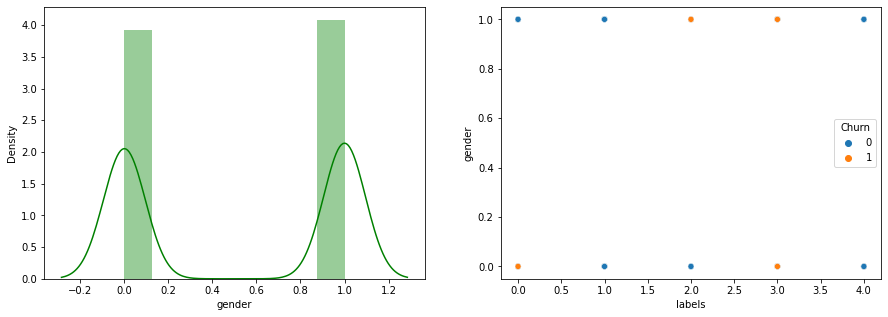

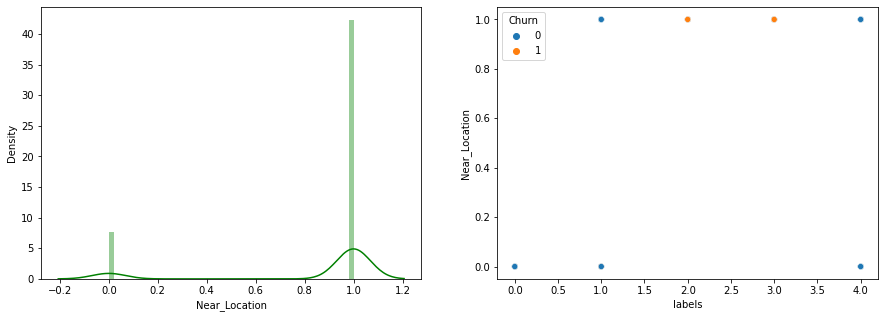

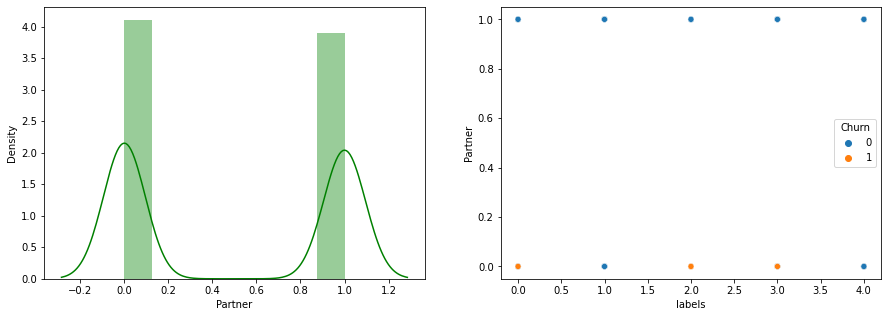

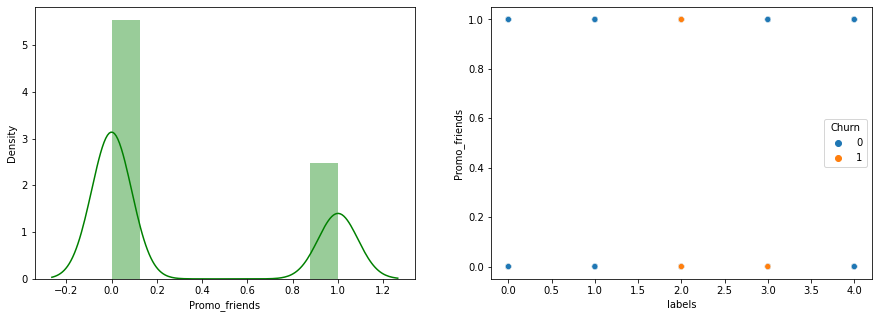

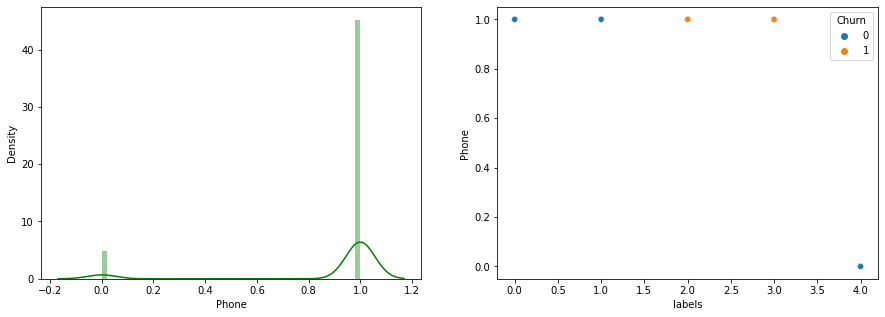

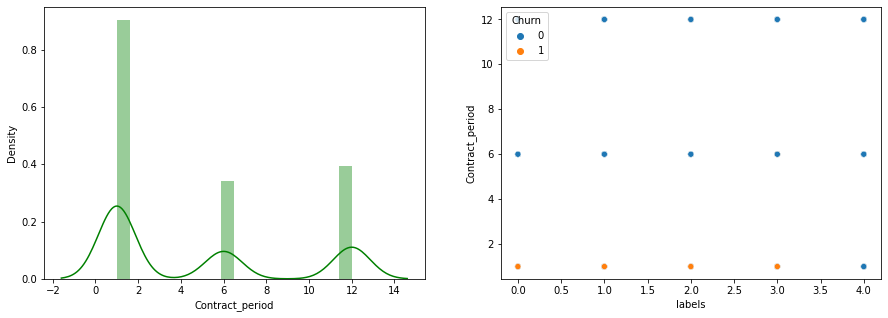

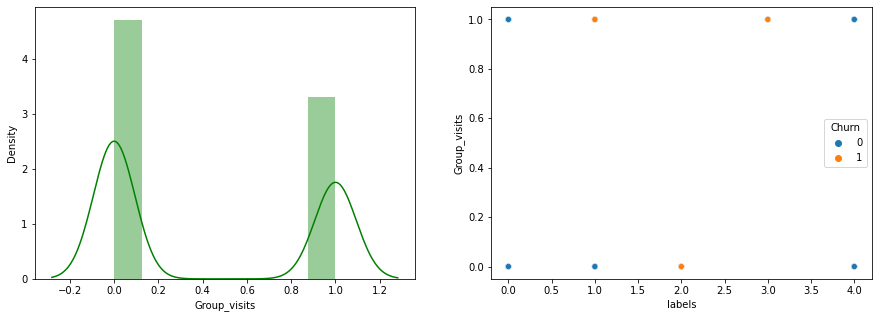

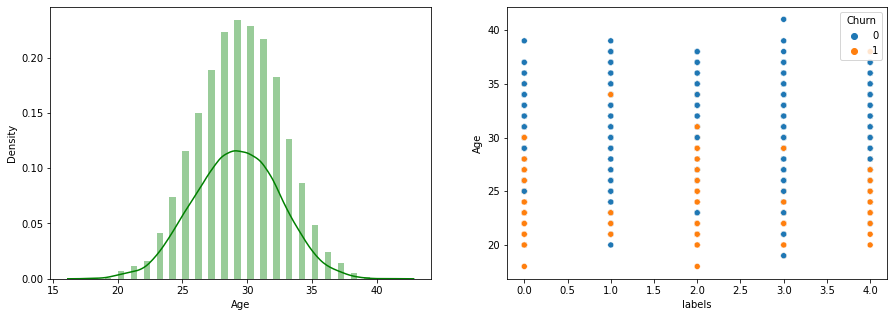

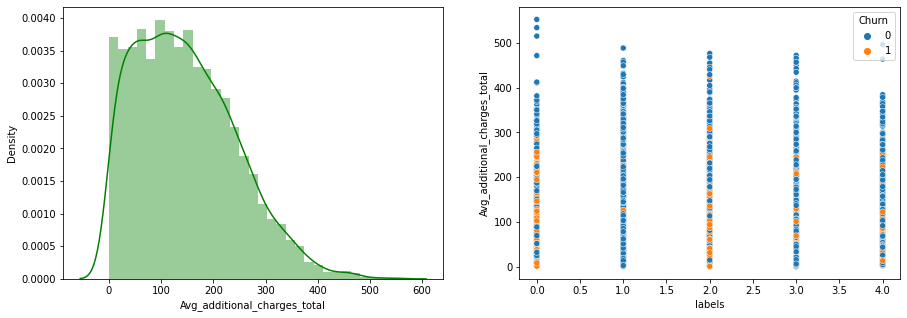

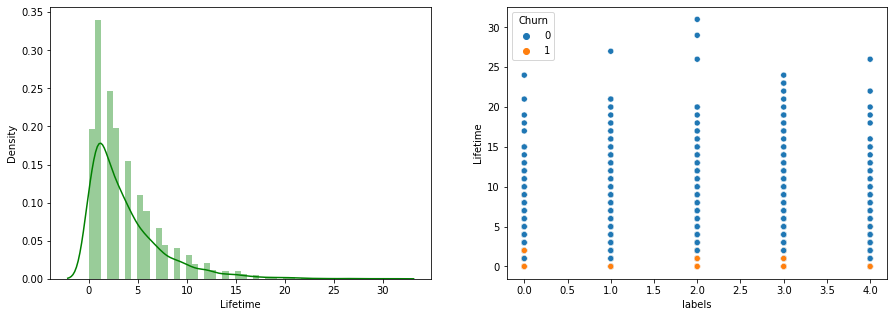

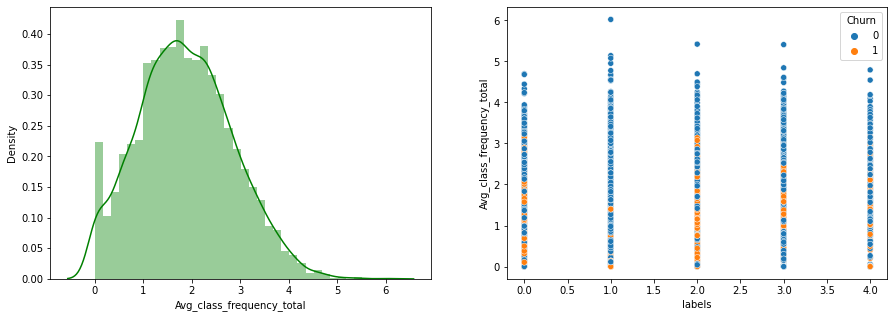

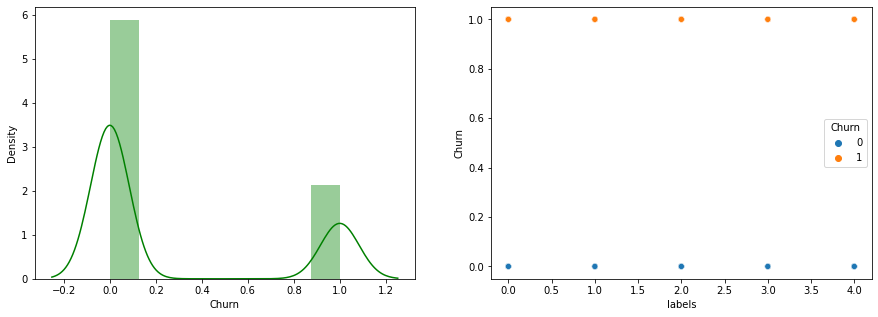

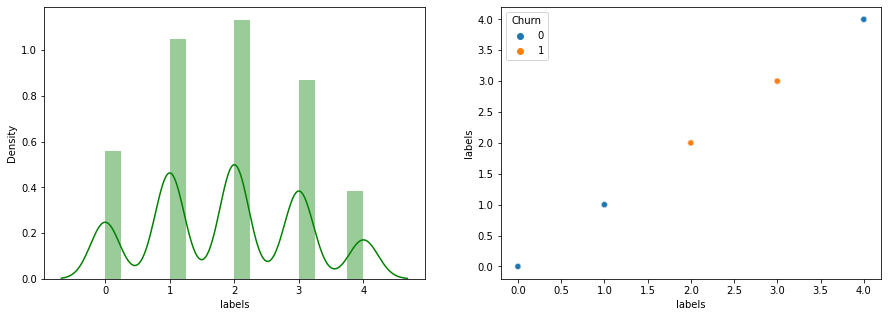

In [20]:
for col in data_k_means.columns:
    
    plt.figure(figsize=(15, 5))
    ax1 = plt.subplot(1, 2, 1)
    ax1 = sns.distplot(data_k_means[col], color = 'green')
        
    ax2 = plt.subplot(1, 2, 2)
    ax2 = sns.scatterplot(x = data_k_means['labels'], y = data_k_means[col], hue = data_k_means['Churn'], color = 'green')
    plt.show()

Графики распределения также подтверждают выводы, сделанные из кластеризации. Признаки оттока явно отслеживаются в 0 и 2 группах, а портрет пользователя данных групп подтвержается визуализацией на графиках. 

# Выводы и рекомендации <a id="part_5"></a>

В ходе проведения работы были исследованы данные клиентов фитнес-центра. В начале работы была проведена предобработка данных и сформулированы гипотезы закономерностей - какие пользователи чаще попадают в пул оттока. 
Был сформулирован гипотетический портрет клиента: 

- **Постоянный клиент:** Возраст - 30 лет, живет или работает рядом с залом. Пришел в зал от компании-партнера или по промоакции "Приведи друга", средняя длительность абонемента - 6 мес.  В среднем приходит в зал раз в 2 недели, тратит на допуслуги сумму 158.44, средний лайфтайм такого клиента- 4.7 мес. 
- **Ушедший клиент:** Возраст - 27 лет, чаще всего живет или работает рядом с залом. Маловероятно, что он пришел в зал от компании партнера или по промоакции, средняя длительность абонемента - чуть меньше 2 мес. Посещает зал в среднем 1.5 раза в неделю, тратит на допуслуги 115.08, средний лайфтайм - 1 месяц. 

При изучении признаков были выявленны коллинеарные признаки: `Contract_period` - `Month_to_end_contract`, `Avg_class_frequency_total` - `Avg_class_frequency_current_month`. Для нормализации моделей один из пары признаков был удален.  

Для прогнозирования оттока в будущем были обучены две модели бинарной классификации: логистическая регрессиия (`LogisticRegression`) и случайный лес (`RandomForestClassifier`). Обе модели показали отличные результаты, которые практически не отличаются друг от друга. Я предпочла бы использовать в дальнейшем модель `RandomForestClassifier`, т.к. ее показатели метрик чуть выше, чем у `LogisticRegression`. 

В третьей части работы была проведена кластеризация данных при помощи дендрограммы и модели `KMean`. Дендрограмма показала, что минимальное количество кластеров для нашего набора данных - 4. Далее была проведена кластеризация быстрым методом - `KMean`, разбиение проводилось на 5 кластеров. Опередено, что больше всего подверженны оттоку клиенты 0 и 2 кластера (отток 38-39%), далее идет 4 кластер (26,68%), 3й (20.09%) и, наконец, 1 кластер (отток- всего 12.10%).

Исходя из этих данных были конкретизированы портреты клиентов:

**Постоянный клиент:**
- Живет рядом с залом,
- Большая часть клиентов пришла от компаний-партнеров или по программе "Приведи друга". 
- Длительный срок абонемента- от 8 мес. 
- Около половины пользователей посещает групповые занятия, частота посещения зала- около 2 раз в неделю .
- Возраст- 30 лет. 

**Ушедший клиент:**
- Большая часть живет на удалении от зала.
- Небольшая часть клиентов пришла из компании-партнеров, программа "Приведи друга" практически не используется. 
- Имеют очень небольшой срок абонемента до 2 мес.
- Практически не посещают групповые занятия, имеют лайфтайм ок. 1 месяца и посещают зал около 1,5 раз в неделю.
- Возраст-  27 лет. 

**Какие рекомендации можно дать для удержания клиентов:**
- Обратить внимание на расширение программы компаний-партнеров среди близко расположенных предприятий. Видно, что постоянные клиенты живут недалеко от зала и приходят именно из партнерских компании. Возможно, в этом поможет партнерство с каким-то близлежащим бизнес-центром, крупным предприятием. Также можно обратить внимание на акцию "Приведи друга" и каким-то образом простимулировать уже имеющихся клиентов (бонусами для них), т.к. эта программа также хорошо работает для удержания. 

- Думаю, стоит убрать из оборота небольшие абонементы (менее полугода), т.к. именно клиенты с месячными абонементами удерживаются хуже всего- им не жалко прекратить ходить в зал, т.к. стоимость месячного абонемента мала. Маленькие абонементы могут быть заменены на акционные абонементы первого визита (например, 2 недели по сниженной цене для нового клиента). 

- Возможно, стоит сделать "молодежные" абонементы по сниженной цене (но опять же, с большим сроком действия - от 6 мес) для того, чтобы предотвратить отток молодежи. 

- Обратить внимание на групповые занятия - например, активно предлагать их новым клиентам. Возможно, клиенту понравится то или иное занятие с тренером и он впоследствие будет ходить именно на него. 